<a href="https://www.kaggle.com/code/luizlianza/cloudwalk-presentation?scriptVersionId=141397560" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97/raw/9ceae962009236d3570f46e59ce9aa334e4e290f/transactional-sample.csv"
data = pd.read_csv(url)
data.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [2]:
data['has_cbk'].value_counts()

False    2808
True      391
Name: has_cbk, dtype: int64

In [3]:
data['transaction_amount'].describe()

count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [4]:
card_network = data['card_number'].str.slice(stop=1)
card_network.value_counts()

5    1803
4    1074
6     259
2      63
Name: card_number, dtype: int64

In [5]:
card_network = card_network.replace({'5':'Mastercard', '4':'Visa', '3':'American_Express', '2':'Mastercard', '6':'Elo'})
card_network.value_counts()

Mastercard    1866
Visa          1074
Elo            259
Name: card_number, dtype: int64

In [6]:
data['card_network'] = card_network
data.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,card_network
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False,Visa
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True,Visa
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False,Visa
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True,Visa
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False,Elo


In [7]:
for column in data.columns:
  print('{} nan = {}'.format(column, data[column].isna().sum()))

transaction_id nan = 0
merchant_id nan = 0
user_id nan = 0
card_number nan = 0
transaction_date nan = 0
transaction_amount nan = 0
device_id nan = 830
has_cbk nan = 0
card_network nan = 0


In [8]:
type(data['transaction_date'][1])

str

In [9]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
type(data['transaction_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
print(data['transaction_date'].dt.year.value_counts())
print(data['transaction_date'].dt.month.value_counts())
print(data['transaction_date'].dt.day.value_counts())

2019    3199
Name: transaction_date, dtype: int64
11    3047
12     152
Name: transaction_date, dtype: int64
22    355
23    339
29    322
28    287
30    284
1     175
21    175
18    128
26    115
19     89
17     88
27     83
8      65
11     60
24     60
10     58
16     55
9      53
20     52
14     48
25     48
4      48
15     40
7      39
3      34
12     26
5      26
2      25
6      14
13      8
Name: transaction_date, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_style('ticks')

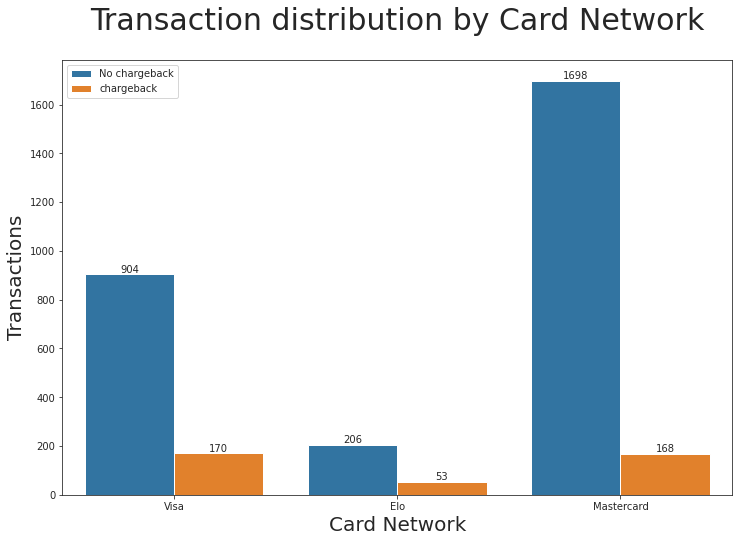

In [13]:
ax = plt.figure(figsize=(12, 8))
ax = sns.countplot(data = data, x='card_network', hue='has_cbk')
ax.set_title('Transaction distribution by Card Network', fontsize=30, pad=30)
ax.set_xlabel('Card Network', fontsize=20)
ax.set_ylabel('Transactions', fontsize=20)
ax.legend(['No chargeback', 'chargeback'])
ax.bar_label(container=ax.containers[1], fmt='%.d')
ax.bar_label(container=ax.containers[0], fmt='%.d')
plt.savefig('Transaction_dist_by_card_network')
plt.show()


In [14]:
week_day = []
for time in data['transaction_date']:
    time_of_week = time.weekday()
    week_day.append(time_of_week)

In [15]:
data['week_day'] = week_day
data['week_day'] = data['week_day'].replace({0: 'monday', 1:'tuesday', 2:'wednesday', 3:'thursday', 4:'friday', 5:'saturday', 6:'sunday'})
data.week_day.value_counts()

friday       805
saturday     756
thursday     549
sunday       392
monday       284
tuesday      256
wednesday    157
Name: week_day, dtype: int64

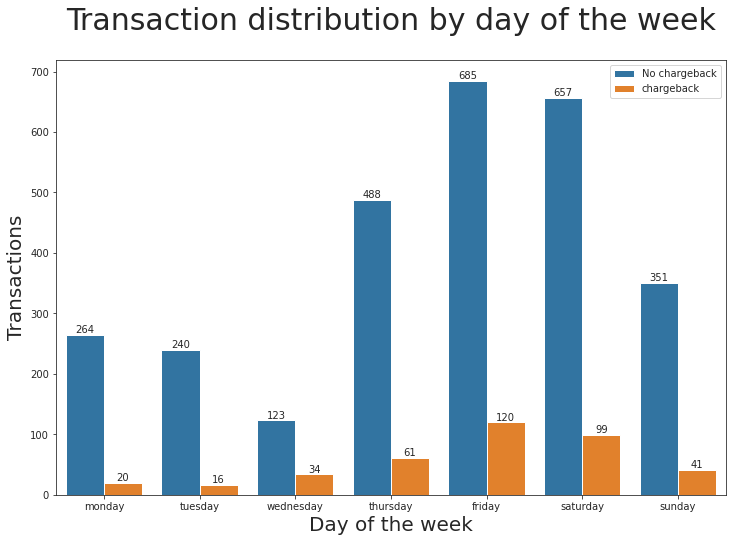

In [16]:
ax = plt.figure(figsize=(12, 8))
ax = sns.countplot(data = data, x='week_day', hue='has_cbk', order = ['monday','tuesday', 'wednesday','thursday','friday','saturday','sunday'])
ax.set_title('Transaction distribution by day of the week', fontsize=30, pad=30)
ax.set_xlabel('Day of the week', fontsize=20)
ax.set_ylabel('Transactions', fontsize=20)
ax.legend(['No chargeback', 'chargeback'])
ax.bar_label(container=ax.containers[1], fmt='%.d')
ax.bar_label(container=ax.containers[0], fmt='%.d')
plt.savefig('Transaction_dist_by_day_of_week')
plt.show()

In [17]:
day_period = []
morning = []
for i in range(5,12):
    morning.append(i)
afternoon = []
for i in range(12,18):
    afternoon.append(i)
night = []
for i in range(18,24):
    night.append(i)
for hour in data['transaction_date'].dt.hour:
    if hour in morning:
        daytime = 'morning'
    elif hour in afternoon:
        daytime = 'afternoon'
    elif hour in night:
        daytime = 'night'
    else:
        daytime = 'late night'
    day_period.append(daytime)        
    

In [18]:
data['day_period'] = day_period
data['day_period'].value_counts()

night         1378
afternoon     1341
late night     342
morning        138
Name: day_period, dtype: int64

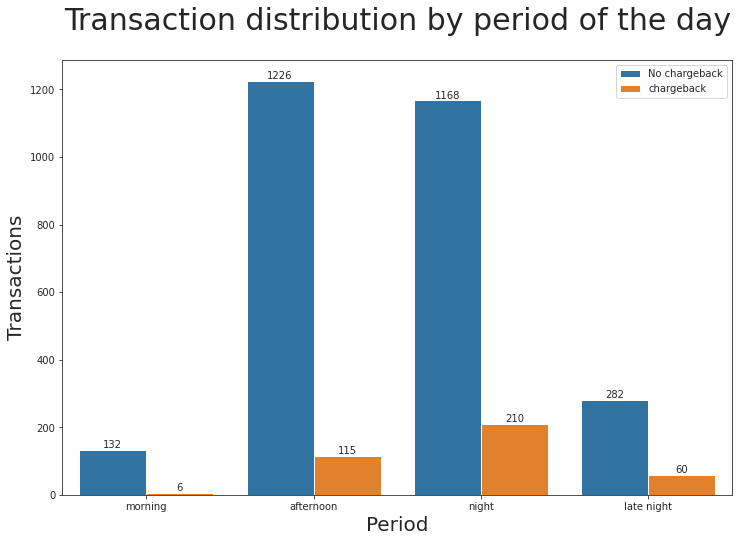

In [19]:
ax = plt.figure(figsize=(12, 8))
ax = sns.countplot(data = data, x='day_period', hue='has_cbk', order = ['morning', 'afternoon', 'night', 'late night'])
ax.set_title('Transaction distribution by period of the day', fontsize=30, pad=30)
ax.set_xlabel('Period', fontsize=20)
ax.set_ylabel('Transactions', fontsize=20)
ax.legend(['No chargeback', 'chargeback'])
ax.bar_label(container=ax.containers[1], fmt='%.d')
ax.bar_label(container=ax.containers[0], fmt='%.d')
plt.savefig('Transaction_dist_by_period_of_day')
plt.show()

In [20]:
values_stratified = []
for value in data['transaction_amount']:
    if value <= 205.235000:
        v_strat = '25%'
    elif value > 205.235000 and value <= 415.940000:
        v_strat = 'Median'
    elif value > 415.940000 and value <= 981.680000:
        v_strat = '75%'
    else:
        v_strat = '100%'
    values_stratified.append(v_strat)

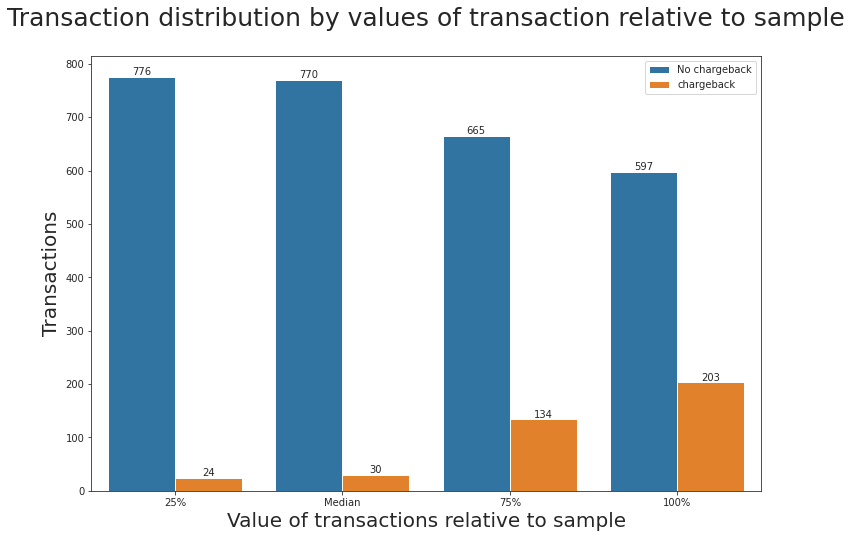

In [21]:
data['values_stratified'] = values_stratified
ax = plt.figure(figsize=(12, 8))
ax = sns.countplot(data = data, x='values_stratified', hue='has_cbk', order=['25%', 'Median', '75%', "100%"])
ax.set_title('Transaction distribution by values of transaction relative to sample', fontsize=25, pad=30)
ax.set_xlabel('Value of transactions relative to sample', fontsize=20)
ax.set_ylabel('Transactions', fontsize=20)
ax.legend(['No chargeback', 'chargeback'])
ax.bar_label(container=ax.containers[1], fmt='%.d')
ax.bar_label(container=ax.containers[0], fmt='%.d')
plt.savefig('Transaction_dist_relative_to_sample')
plt.show()

In [22]:
data.transaction_id.value_counts().sort_values(ascending=False)

21320398    1
21320447    1
21320400    1
21320401    1
21320402    1
           ..
21323592    1
21323593    1
21323594    1
21323595    1
21323596    1
Name: transaction_id, Length: 3199, dtype: int64

In [23]:
merchant_sales = data.merchant_id.value_counts().sort_values(ascending=False)

In [24]:
user_sales = data.user_id.value_counts().sort_values(ascending=False)

In [25]:
device_sales = data.device_id.value_counts().sort_values(ascending=False)

In [26]:
data_by_merchant = data.groupby(['merchant_id'])
data_by_merchant = data_by_merchant['has_cbk'].sum()
data_by_merchant = pd.DataFrame(data_by_merchant)
data_by_merchant = pd.concat([data_by_merchant, merchant_sales], axis=1)
data_by_merchant.rename(columns={'merchant_id': 'total_sales'}, inplace=True)
data_by_merchant['cbk_by_sales']= data_by_merchant['has_cbk']/data_by_merchant['total_sales']
data_by_merchant.sort_values(by='cbk_by_sales', ascending=False, inplace=True)
data_by_merchant.head(20)

,has_cbk,total_sales,cbk_by_sales
7535,1,1,1.0
38337,6,6,1.0
11570,1,1,1.0
21281,1,1,1.0
59875,3,3,1.0
75917,6,6,1.0
65241,3,3,1.0
3531,2,2,1.0
77570,2,2,1.0
11911,2,2,1.0


In [27]:
data_by_user = data.groupby(['user_id'])
data_by_user = data_by_user['has_cbk'].sum()
data_by_user = pd.DataFrame(data_by_user)
data_by_user = pd.concat([data_by_user, user_sales], axis=1)
data_by_user.rename(columns={'user_id': 'total_sales'}, inplace=True)
data_by_user['cbk_by_sales']= data_by_user['has_cbk']/data_by_user['total_sales']
data_by_user.sort_values(by='cbk_by_sales', ascending=False, inplace=True)
data_by_user.head(20)

,has_cbk,total_sales,cbk_by_sales
86411,5,5,1.0
43108,1,1,1.0
79237,1,1,1.0
17929,6,6,1.0
4651,3,3,1.0
4744,1,1,1.0
95694,1,1,1.0
31867,1,1,1.0
79462,1,1,1.0
68191,1,1,1.0


In [28]:
data_by_device = data.groupby(['device_id'])
data_by_device = data_by_device['has_cbk'].sum()
data_by_device = pd.DataFrame(data_by_device)
data_by_device = pd.concat([data_by_device, device_sales], axis=1)
data_by_device.rename(columns={'device_id': 'total_sales'}, inplace=True)
data_by_device['cbk_by_sales']= data_by_device['has_cbk']/data_by_device['total_sales']
data_by_device.sort_values(by='cbk_by_sales', ascending=False, inplace=True)
data_by_device.head(20)

,has_cbk,total_sales,cbk_by_sales
427796.0,1,1,1.0
69227.0,2,2,1.0
890266.0,1,1,1.0
357277.0,6,6,1.0
769545.0,1,1,1.0
313443.0,2,2,1.0
133264.0,1,1,1.0
698520.0,4,4,1.0
314172.0,3,3,1.0
248385.0,1,1,1.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


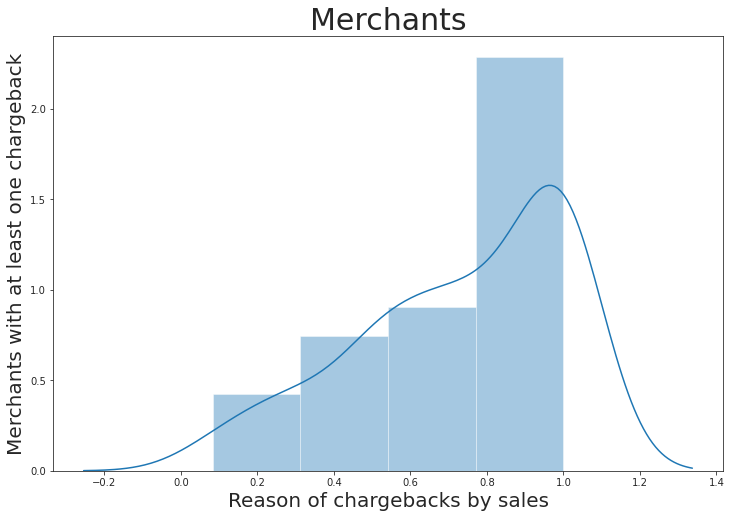

In [29]:
merchant_relative_cbk = data_by_merchant.query('has_cbk != 0')
merchant_relative_cbk = merchant_relative_cbk.query('total_sales > 1')

ax = plt.figure(figsize=(12,8))
ax = sns.distplot(merchant_relative_cbk['cbk_by_sales'])
ax.set_title('Merchants', fontsize=30)
ax.set_xlabel('Reason of chargebacks by sales', fontsize=20)
ax.set_ylabel('Merchants with at least one chargeback', fontsize=20)
plt.savefig('Reason of chargebacks by sales within merchants with at least one chargeback distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


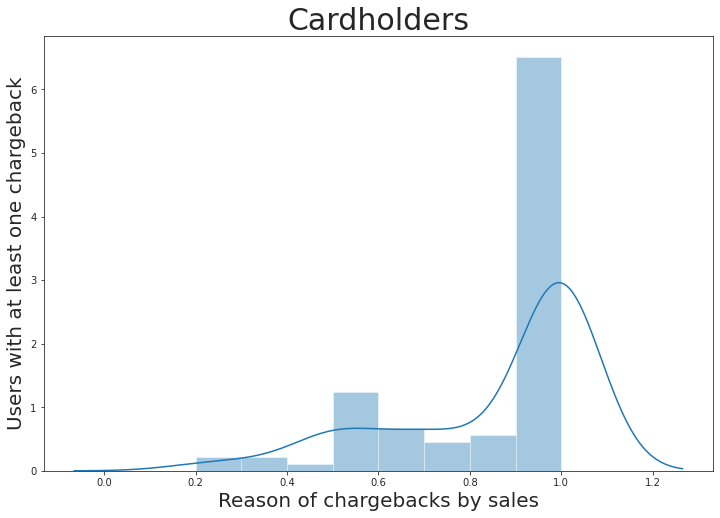

In [30]:
user_relative_cbk = data_by_user.query('has_cbk != 0')
user_relative_cbk = user_relative_cbk.query('total_sales > 1')

ax = plt.figure(figsize=(12,8))
ax = sns.distplot(user_relative_cbk['cbk_by_sales'])
ax.set_title('Cardholders', fontsize=30)
ax.set_xlabel('Reason of chargebacks by sales', fontsize=20)
ax.set_ylabel('Users with at least one chargeback', fontsize=20)
plt.savefig('Reason of chargebacks by sales within users with at least one chargeback distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


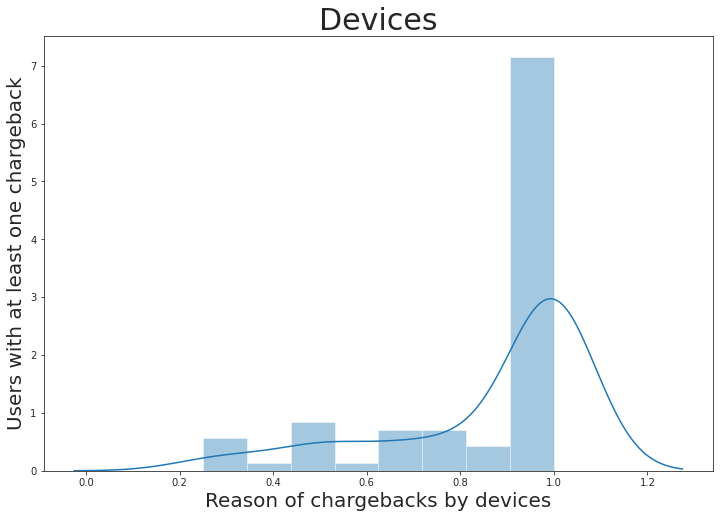

In [31]:
device_relative_cbk = data_by_device.query('has_cbk != 0')
device_relative_cbk = device_relative_cbk.query('total_sales > 1')

ax = plt.figure(figsize=(12,8))
ax = sns.distplot(device_relative_cbk['cbk_by_sales'])
ax.set_title('Devices', fontsize=30)
ax.set_xlabel('Reason of chargebacks by devices', fontsize=20)
ax.set_ylabel('Users with at least one chargeback', fontsize=20)
plt.savefig('Reason of chargebacks by sales within devices with at least one chargeback distribution')
plt.show()

In [32]:
data.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,card_network,week_day,day_period,values_stratified
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False,Visa,sunday,night,Median
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,Visa,sunday,night,75%
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False,Visa,sunday,night,75%
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True,Visa,sunday,night,100%
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False,Elo,sunday,night,25%


In [33]:
data_for_model = data
data_for_model['week_day'] = data_for_model['week_day'].replace({'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3, 'friday': 4, 'saturday': 5, 'sunday': 6})
data_for_model['day_period'] = data_for_model['day_period'].replace({'late night': 0, 'morning': 1, 'afternoon': 2, 'night': 3})
data_for_model['card_network'] = data_for_model['card_network'].replace({'Visa': 0, 'Mastercard': 1, 'Elo': 2})
data_for_model['hour'] = data_for_model['transaction_date'].dt.hour
data_for_model.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,card_network,week_day,day_period,values_stratified,hour
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False,0,6,3,Median,23
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,0,6,3,75%,22
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False,0,6,3,75%,22
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True,0,6,3,100%,21
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False,2,6,3,25%,21


In [34]:
data_for_model['card_network'].value_counts()

1    1866
0    1074
2     259
Name: card_network, dtype: int64

In [35]:
data_for_model['week_day'].value_counts()

4    805
5    756
3    549
6    392
0    284
1    256
2    157
Name: week_day, dtype: int64

In [36]:
data_for_model['day_period'].value_counts()

3    1378
2    1341
0     342
1     138
Name: day_period, dtype: int64

In [37]:
values_stratified = []
for value in data_for_model['transaction_amount']:
    if value <= 205.235000:
        v_strat = 0
    elif value > 205.235000 and value <= 415.940000:
        v_strat = 1
    elif value > 415.940000 and value <= 981.680000:
        v_strat = 2
    else:
        v_strat = 3
    values_stratified.append(v_strat)
    

In [38]:
import numpy as np
card_avaiable_numbers = []
for card in data_for_model['card_number']:
    only_numbers = card.replace('*','')
    only_numbers = int(only_numbers)
    card_avaiable_numbers.append(only_numbers)
    
data_for_model['card_avaiable_numbers'] = card_avaiable_numbers

In [39]:
data_for_model['values_stratified'] = values_stratified
data_for_model.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,card_network,week_day,day_period,values_stratified,hour,card_avaiable_numbers
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False,0,6,3,1,23,4345059116
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True,0,6,3,2,22,4444564210
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False,0,6,3,2,22,4258507024
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True,0,6,3,3,21,4642963991
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False,2,6,3,0,21,6504876116


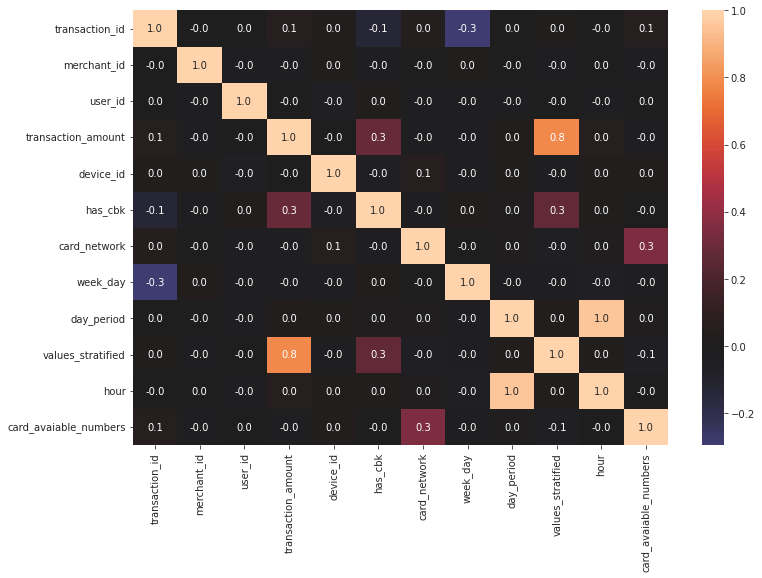

In [40]:
corr_matrix = data_for_model.corr()

ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_matrix, center=0, annot=True, fmt='.1f')

In [41]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import confusion_matrix

In [42]:
data_for_model['device_id'] = data_for_model['device_id'].fillna(9999999)
data_for_model['has_cbk'] = list(map(int,data_for_model['has_cbk']))
y = data_for_model['has_cbk']
X = data_for_model.drop(columns=['has_cbk', 'day_period', 'transaction_id','transaction_date','card_number', 'values_stratified'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3, random_state = 1405,stratify = y)

In [44]:
rus = SVMSMOTE(random_state=1405, k_neighbors=1, m_neighbors=5)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [45]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [46]:
import numpy as np
bnb = BernoulliNB(binarize=np.median(X_train))
bnb.fit(X_train, y_train)
predict_bnb = bnb.predict(X_test)

In [47]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1405)
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)

In [48]:
clf = LogisticRegression(random_state=1405)
clf.fit(X_train, y_train)
predict_clf = dtc.predict(X_test)

In [49]:
rdc = RandomForestClassifier(criterion='entropy', n_estimators=600, random_state=1405)
rdc.fit(X_train, y_train)
predict_rdc = rdc.predict(X_test)

In [50]:
xgb = xgb.XGBClassifier(random_state=1405)
xgb.fit(X_train, y_train)
predict_xgb = xgb.predict(X_test)

In [51]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [52]:
recall_knn = recall_score(y_test, predict_knn)
recall_bnb = recall_score(y_test, predict_bnb)
recall_dtc = recall_score(y_test, predict_dtc)
recall_clf = recall_score(y_test, predict_clf)
recall_rdc = recall_score(y_test, predict_rdc)
recall_xgb = recall_score(y_test, predict_xgb)

In [53]:
precision_knn = precision_score(y_test, predict_knn)
precision_bnb = precision_score(y_test, predict_bnb)
precision_dtc = precision_score(y_test, predict_dtc)
precision_clf = precision_score(y_test, predict_clf)
precision_rdc = precision_score(y_test, predict_rdc)
precision_xgb = precision_score(y_test, predict_xgb)

In [54]:
Results = {'precision':[precision_knn, precision_bnb, precision_dtc, precision_clf, precision_rdc, precision_xgb],
           'recall':[recall_knn, recall_bnb, recall_dtc, recall_clf, recall_rdc, recall_xgb]}

Results = pd.DataFrame(Results, index=['KNearestNeighbors', 'BernoulliNB', 'DecisionTreeClassifier', 'Logit', 'RandomForestClassifier', 'XGBoost'])

Results

,precision,recall
KNearestNeighbors,0.410596,0.529915
BernoulliNB,0.328125,0.179487
DecisionTreeClassifier,0.471831,0.572650
Logit,0.471831,0.572650
RandomForestClassifier,0.738636,0.555556
XGBoost,0.695238,0.623932


In [55]:
confusion_matrix(y_test, predict_rdc)

array([[820,  23],
       [ 52,  65]])

In [56]:
confusion_matrix(y_test, predict_xgb)

array([[811,  32],
       [ 44,  73]])

In [57]:
confusion_matrix(y_test, predict_bnb)

array([[800,  43],
       [ 96,  21]])

In [58]:
X_train

,merchant_id,user_id,transaction_amount,device_id,card_network,week_day,hour,card_avaiable_numbers
0,58284,42806,307.580000,601936.0,1,5,23,5485731790
1,54218,67117,65.420000,9999999.0,0,5,20,4824255112
2,6112,18591,524.030000,643866.0,1,3,20,5480467500
3,28785,80202,178.020000,163561.0,2,6,18,6062825220
4,52378,34150,368.420000,393761.0,1,6,20,5438825406
...,...,...,...,...,...,...,...,...
3925,1308,96025,2103.135655,438940.0,0,4,17,4066554980
3926,44927,21768,980.775947,357277.0,1,5,15,5300343859
3927,67764,21768,1145.559539,357277.0,1,6,16,5300343859
3928,89943,86411,1868.268191,597308.0,2,6,21,6516532256
